In [1]:
# import user and user engagement data, user data encoding uses ISO-8859-1
import pandas as pd
df_user_eg = pd.read_csv("takehome_user_engagement.csv")
df_user = pd.read_csv("takehome_users.csv", encoding = "ISO-8859-1")

In [2]:
# check out data format
df_user.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 10 columns):
object_id                     12000 non-null int64
creation_time                 12000 non-null object
name                          12000 non-null object
email                         12000 non-null object
creation_source               12000 non-null object
last_session_creation_time    8823 non-null float64
opted_in_to_mailing_list      12000 non-null int64
enabled_for_marketing_drip    12000 non-null int64
org_id                        12000 non-null int64
invited_by_user_id            6417 non-null float64
dtypes: float64(2), int64(4), object(4)
memory usage: 937.6+ KB


In [3]:
# convert last_session_creation_time to datetime format, ignore NaN values
import datetime as dt
df_user['last_session_creation_time'] = df_user.apply(lambda row: row['last_session_creation_time']\
                                                      if pd.isnull(row['last_session_creation_time'])\
                                                      else dt.datetime.fromtimestamp(row['last_session_creation_time']),\
                                                      axis = 1)

In [4]:
df_user.head()

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,2014-04-21 23:53:30,1,0,11,10803.0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,2014-03-30 23:45:04,0,0,1,316.0
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,2013-03-19 19:14:52,0,0,94,1525.0
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,2013-05-22 04:09:28,0,0,1,5151.0
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,2013-01-22 05:14:20,0,0,193,5240.0


In [5]:
# engagement has info of user who logged in every day
df_user_eg.head()

,time_stamp,user_id,visited
0,2014-04-22 03:53:30,1,1
1,2013-11-15 03:45:04,2,1
2,2013-11-29 03:45:04,2,1
3,2013-12-09 03:45:04,2,1
4,2013-12-25 03:45:04,2,1


In [6]:
# for convenience sake, merge the user and the engagement datasets together
df_result = pd.merge(df_user_eg, df_user, how='left', left_on='user_id', right_on='object_id')

In [7]:
df_result.head()

,time_stamp,user_id,visited,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
0,2014-04-22 03:53:30,1,1,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,2014-04-21 23:53:30,1,0,11,10803.0
1,2013-11-15 03:45:04,2,1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,2014-03-30 23:45:04,0,0,1,316.0
2,2013-11-29 03:45:04,2,1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,2014-03-30 23:45:04,0,0,1,316.0
3,2013-12-09 03:45:04,2,1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,2014-03-30 23:45:04,0,0,1,316.0
4,2013-12-25 03:45:04,2,1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,2014-03-30 23:45:04,0,0,1,316.0


In [8]:
df_result.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 207917 entries, 0 to 207916
Data columns (total 13 columns):
time_stamp                    207917 non-null object
user_id                       207917 non-null int64
visited                       207917 non-null int64
object_id                     207917 non-null int64
creation_time                 207917 non-null object
name                          207917 non-null object
email                         207917 non-null object
creation_source               207917 non-null object
last_session_creation_time    207917 non-null datetime64[ns]
opted_in_to_mailing_list      207917 non-null int64
enabled_for_marketing_drip    207917 non-null int64
org_id                        207917 non-null int64
invited_by_user_id            116887 non-null float64
dtypes: datetime64[ns](1), float64(1), int64(6), object(5)
memory usage: 22.2+ MB


In [9]:
# convert dataframe object columns to datetime
df_result['time_stamp'] = pd.to_datetime(df_result['time_stamp'])
df_result['creation_time'] = pd.to_datetime(df_result['creation_time'])

In [10]:
# create a temp dataframe to calculate daily visits
df1 = df_result[['time_stamp','visited']]
df1.set_index('time_stamp', inplace=True)
df1 = df1.resample('M').count()
df1 = df1.reset_index()
df1.head()

,time_stamp,visited
0,2012-05-31,4
1,2012-06-30,404
2,2012-07-31,714
3,2012-08-31,1019
4,2012-09-30,1513


In [11]:
df1.tail()

,time_stamp,visited
21,2014-02-28,15350
22,2014-03-31,18227
23,2014-04-30,18974
24,2014-05-31,20208
25,2014-06-30,1626


In [12]:
# since the 2014 June just started, we can exclude it from our timestamp
df_result =  df_result.loc[df_result['time_stamp'] < '2014-06-01 00:00:00']
df1 = df1.loc[df1['time_stamp'] < '2014-06-01']

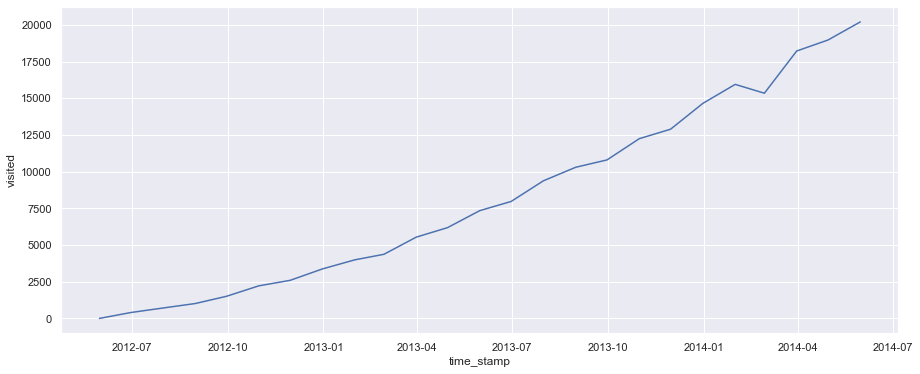

In [13]:
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
%matplotlib inline

# import seaborn and matplotlib, display plot
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(15,6))
sns.set(style="darkgrid")
sns.lineplot(x="time_stamp", y="visited",
             data=df1)
plt.show()

In [14]:
# convert user creation time to datetime format
df_user['creation_time'] = pd.to_datetime(df_user['creation_time'])

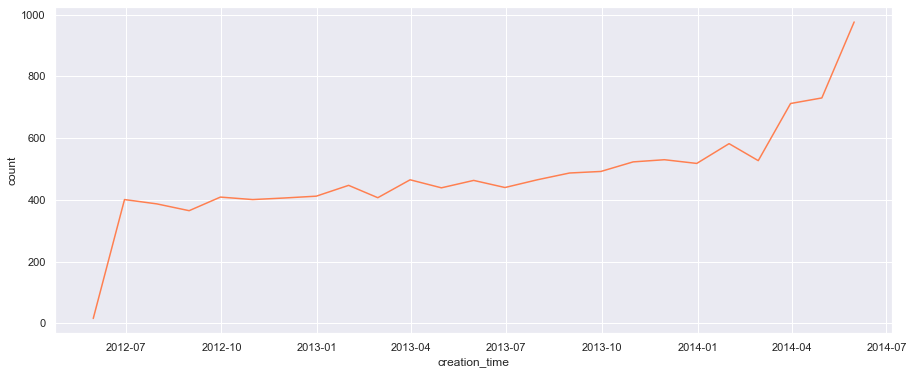

In [15]:
df2 = df_user[['creation_time']].copy()
df2['count'] = 1
df2.set_index('creation_time', inplace=True)
df2 = df2.resample('M').count()
df2 = df2.reset_index()
plt.figure(figsize=(15,6))
sns.set(style="darkgrid")
sns.lineplot(x="creation_time", y="count",
             data=df2,color="coral")
plt.show()

In [16]:
df3 = df_result[['time_stamp','visited']].copy()
df3.set_index('time_stamp', inplace=True)
df3 = df3.resample('1H').count()
df3 = df3.reset_index()
df3["hour"] = [t.hour for t in pd.to_datetime(df3.time_stamp)]
df3.head()

,time_stamp,visited,hour
0,2012-05-31 08:00:00,1,8
1,2012-05-31 09:00:00,0,9
2,2012-05-31 10:00:00,0,10
3,2012-05-31 11:00:00,0,11
4,2012-05-31 12:00:00,0,12


In [17]:
df3_bar = df3.groupby(['hour'])['visited'].mean().reset_index()
df3_bar.head()

,hour,visited
0,0,11.280822
1,1,7.728767
2,2,12.873973
3,3,10.991781
4,4,11.517808


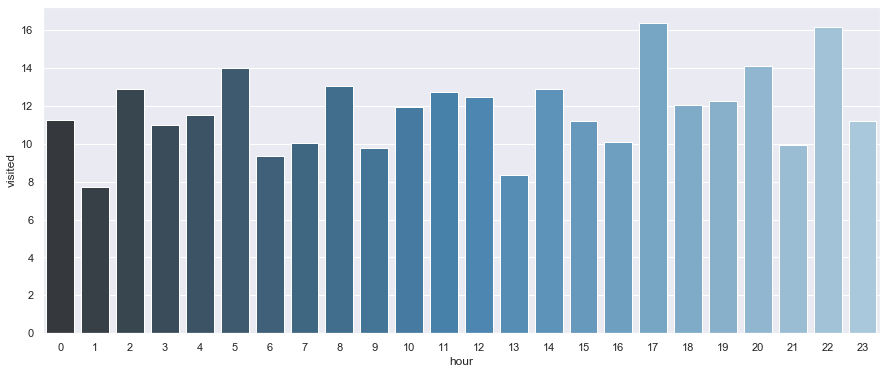

In [18]:
plt.figure(figsize=(15,6))
sns.barplot(x="hour", y="visited", data=df3_bar, palette = "Blues_d")

In [19]:
def dow(date):
    days=["Monday","Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday"]
    dayNumber=date.weekday()
    return(days[dayNumber])

In [20]:
df3['dow'] = df3.apply(lambda row: dow(row['time_stamp']), axis = 1)

In [21]:
df_dow = df3.groupby(['dow'])['visited'].sum().reset_index()
df_dow

,dow,visited
0,Friday,29729
1,Monday,29307
2,Saturday,29728
3,Sunday,29324
4,Thursday,29448
5,Tuesday,29386
6,Wednesday,29369


In [22]:
df4 = df_result[["object_id","email", "creation_source", "visited"]].copy()
df4.head()

,object_id,email,creation_source,visited
0,1,AugustCClausen@yahoo.com,GUEST_INVITE,1
1,2,MatthewPoole@gustr.com,ORG_INVITE,1
2,2,MatthewPoole@gustr.com,ORG_INVITE,1
3,2,MatthewPoole@gustr.com,ORG_INVITE,1
4,2,MatthewPoole@gustr.com,ORG_INVITE,1


In [23]:
df4['domain'] = df4['email'].str.split('@').str[1]
df4['domain'] = df4.domain.str.replace('.com' , '')

In [24]:
df4.head()

,object_id,email,creation_source,visited,domain
0,1,AugustCClausen@yahoo.com,GUEST_INVITE,1,yahoo
1,2,MatthewPoole@gustr.com,ORG_INVITE,1,gustr
2,2,MatthewPoole@gustr.com,ORG_INVITE,1,gustr
3,2,MatthewPoole@gustr.com,ORG_INVITE,1,gustr
4,2,MatthewPoole@gustr.com,ORG_INVITE,1,gustr


In [25]:
df5 = df4.groupby(['object_id','domain'])['visited'].sum().reset_index()
df5.sort_values(['visited'], axis=0, 
                 ascending=False, inplace=True)
df5.head()

,object_id,domain,visited
2650,3623,jourrapide,606
655,906,gmail,596
1313,1811,gmail,593
5537,7590,qqgix,586
5866,8068,hotmail,585


In [26]:
# obtain user and visit counts for highest visit domains
df5['count'] = 1 
df5_visit = df5[['domain','visited']].groupby(['domain'])['visited'].sum().reset_index()
df5_usrcount = df5[['domain','count']].groupby(['domain'])['count'].sum().reset_index()
df5_visit = df5_visit.sort_values(by='visited', ascending=False).head(6)
df5 = pd.merge(df5_visit, df5_usrcount, how='left', left_on='domain', right_on='domain')
df5

,domain,visited,count
0,gmail,70764,2924
1,yahoo,31141,1723
2,hotmail,25232,801
3,jourrapide,23106,879
4,gustr,19358,840
5,cuvox.de,16371,825


In [27]:
df5['avg_user_visit'] = df5['visited']/df5['count']
df5

,domain,visited,count,avg_user_visit
0,gmail,70764,2924,24.201094
1,yahoo,31141,1723,18.073709
2,hotmail,25232,801,31.500624
3,jourrapide,23106,879,26.286689
4,gustr,19358,840,23.045238
5,cuvox.de,16371,825,19.843636


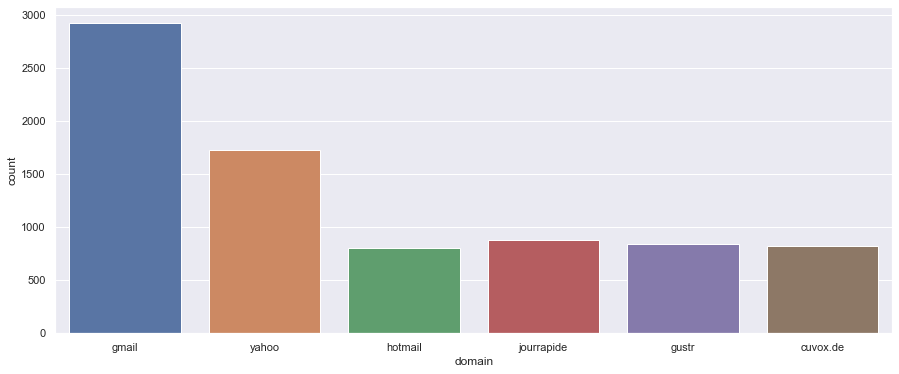

In [28]:
plt.figure(figsize=(15,6))
sns.barplot(x="domain", y="count", data=df5)

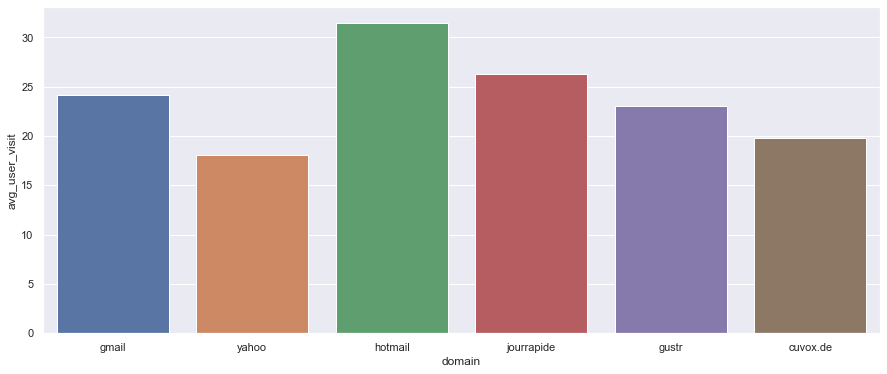

In [29]:
plt.figure(figsize=(15,6))
sns.barplot(x="domain", y="avg_user_visit", data=df5)

In [30]:
df7 = df4.groupby(['object_id','creation_source'])['visited'].sum().reset_index()
df7['count'] = 1 
df7 = df7.groupby(['creation_source'])['count'].sum().reset_index()
df7

,creation_source,count
0,GUEST_INVITE,1583
1,ORG_INVITE,3180
2,PERSONAL_PROJECTS,764
3,SIGNUP,1893
4,SIGNUP_GOOGLE_AUTH,1383


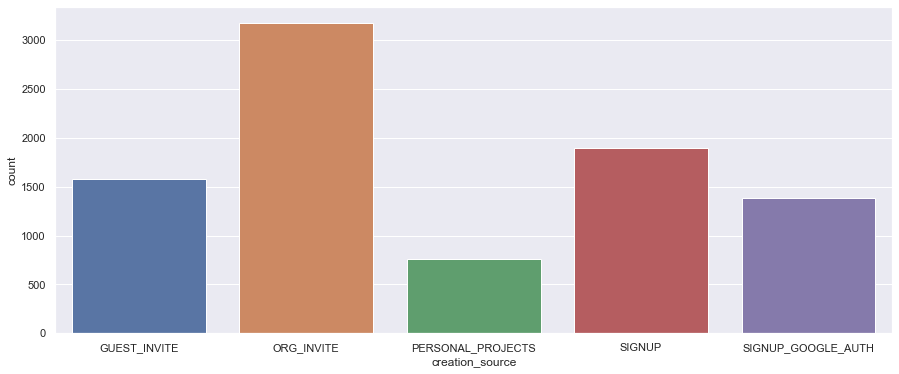

In [31]:
plt.figure(figsize=(15,6))
sns.barplot(x="creation_source", y="count", data=df7)

### Summary
1. Visits seem to be increasing month by month, which is a good indication of growth;
2. New Accounts created sees increased growth after 2014 March;
3. A lot of visits happen at 5 in the afternoon and 10 at night;
4. Each day of the week sees similar amount of visits;
5. Gmail has the most registered users;
6. On average, hotmail users have the most visits for us;
7. A lot of people were invited by their orginization.

#### Notes
A few machine learning models were tested in the background to try and predict visits using the data given, however, the R2_score was below acceptable hence the analysis was deleted from this file